In [9]:
from keras.datasets import reuters

In [10]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [11]:
len(train_data)

8982

In [12]:
 len(test_data)

2246

In [13]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [14]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [15]:
train_labels[10]

3

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
from keras.utils.np_utils import to_categorical

In [19]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [20]:
from keras import models
from keras import layers

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 49ms/step - loss: 3.1477 - accuracy: 0.4293 - val_loss: 1.7388 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 31ms/step - loss: 1.5192 - accuracy: 0.6907 - val_loss: 1.3050 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.0928 - accuracy: 0.7685 - val_loss: 1.1255 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.8231 - accuracy: 0.8282 - val_loss: 1.0326 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6580 - accuracy: 0.8641 - val_loss: 0.9606 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5313 - accuracy: 0.8902 - val_loss: 0.9530 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.4183 - accuracy: 0.9146 - val_loss: 0.9068 - val_accuracy: 0.8110
Epoch 8/20
16

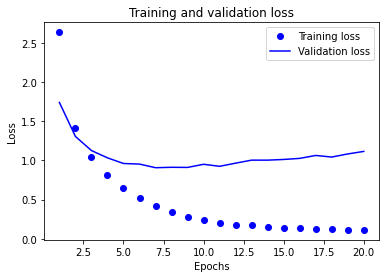

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

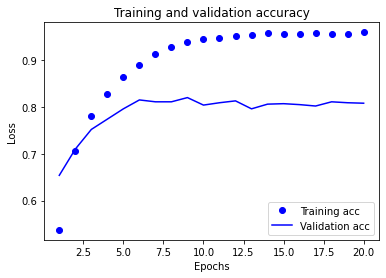

In [28]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 47ms/step - loss: 3.0515 - accuracy: 0.4306 - val_loss: 1.7291 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 1s 33ms/step - loss: 1.4829 - accuracy: 0.7079 - val_loss: 1.3240 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 0s 30ms/step - loss: 1.0737 - accuracy: 0.7716 - val_loss: 1.1414 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 31ms/step - loss: 0.8475 - accuracy: 0.8190 - val_loss: 1.0549 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 0s 31ms/step - loss: 0.6869 - accuracy: 0.8536 - val_loss: 0.9705 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 1s 31ms/step - loss: 0.5408 - accuracy: 0.8875 - val_loss: 0.9330 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 0s 31ms/step - loss: 0.4375 - accuracy: 0.9071 - val_loss: 0.9035 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [30]:
results

[0.9669235944747925, 0.7849510312080383]

In [31]:
predictions = model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0000001